In [1]:
!pip install scikit-learn

You should consider upgrading via the 'c:\python\python36\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_validate
import seaborn as sns
from scipy import stats


In [3]:
df_raw = pd.read_csv("./data/house_data.csv")

In [4]:
df_raw

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df_raw.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
def function_to_pair_plot(df):
    plt.figure(dpi=120)
    sns.pairplot(df)
    plt.show()

In [8]:
df = df_raw.loc[ : , df_raw.columns != 'Price']
df_sample = df.sample(n = 10000)

In [9]:
df_sample_full = df_raw.sample(n = 10000)

<Figure size 720x480 with 0 Axes>

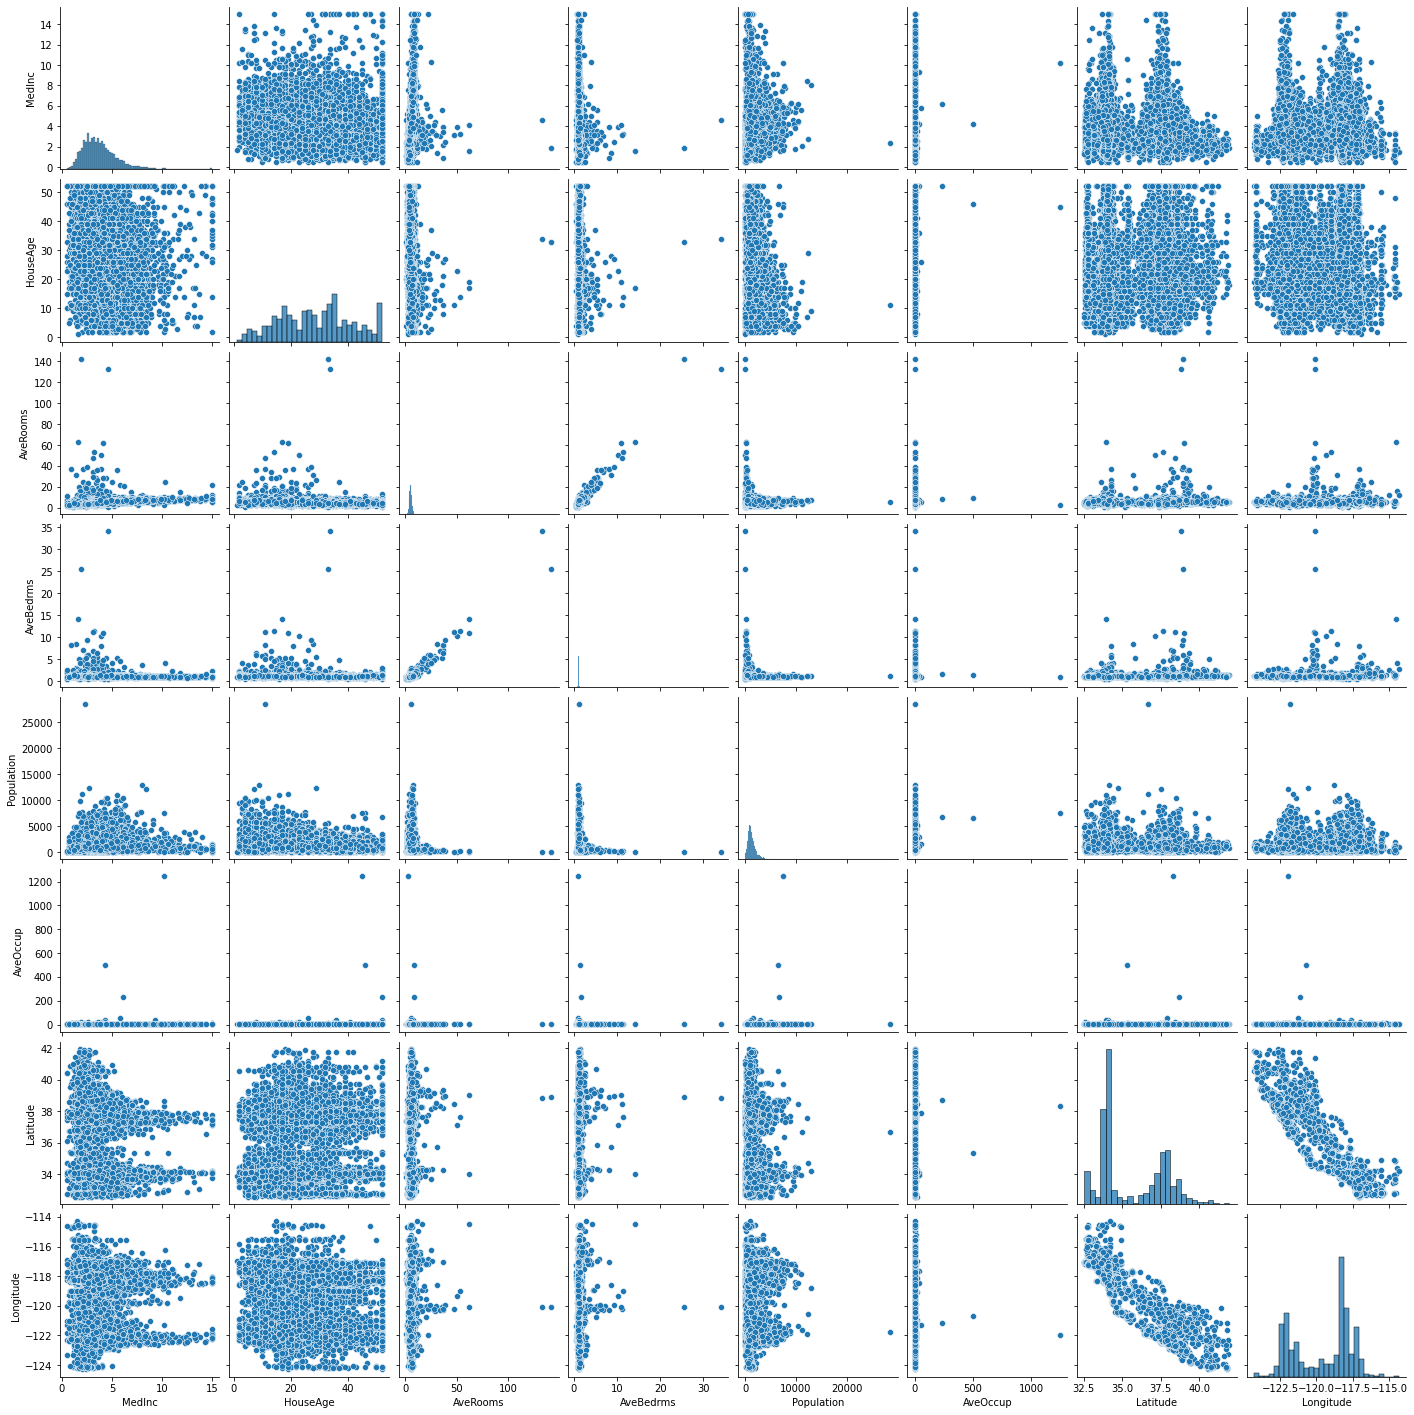

In [10]:
function_to_pair_plot(df_sample)

Average bedroom and Average room seem covariated with each other (positively)

There are some outliers with avg room, avg bedroom, avg occuppation. 

Long and Lat are covariated with each other (negatively)

In [11]:
def function_to_pair_plot_kde(df):
    plt.figure(dpi=120)
    sns.pairplot(df, diag_kind="kde")
    plt.show()

<Figure size 720x480 with 0 Axes>

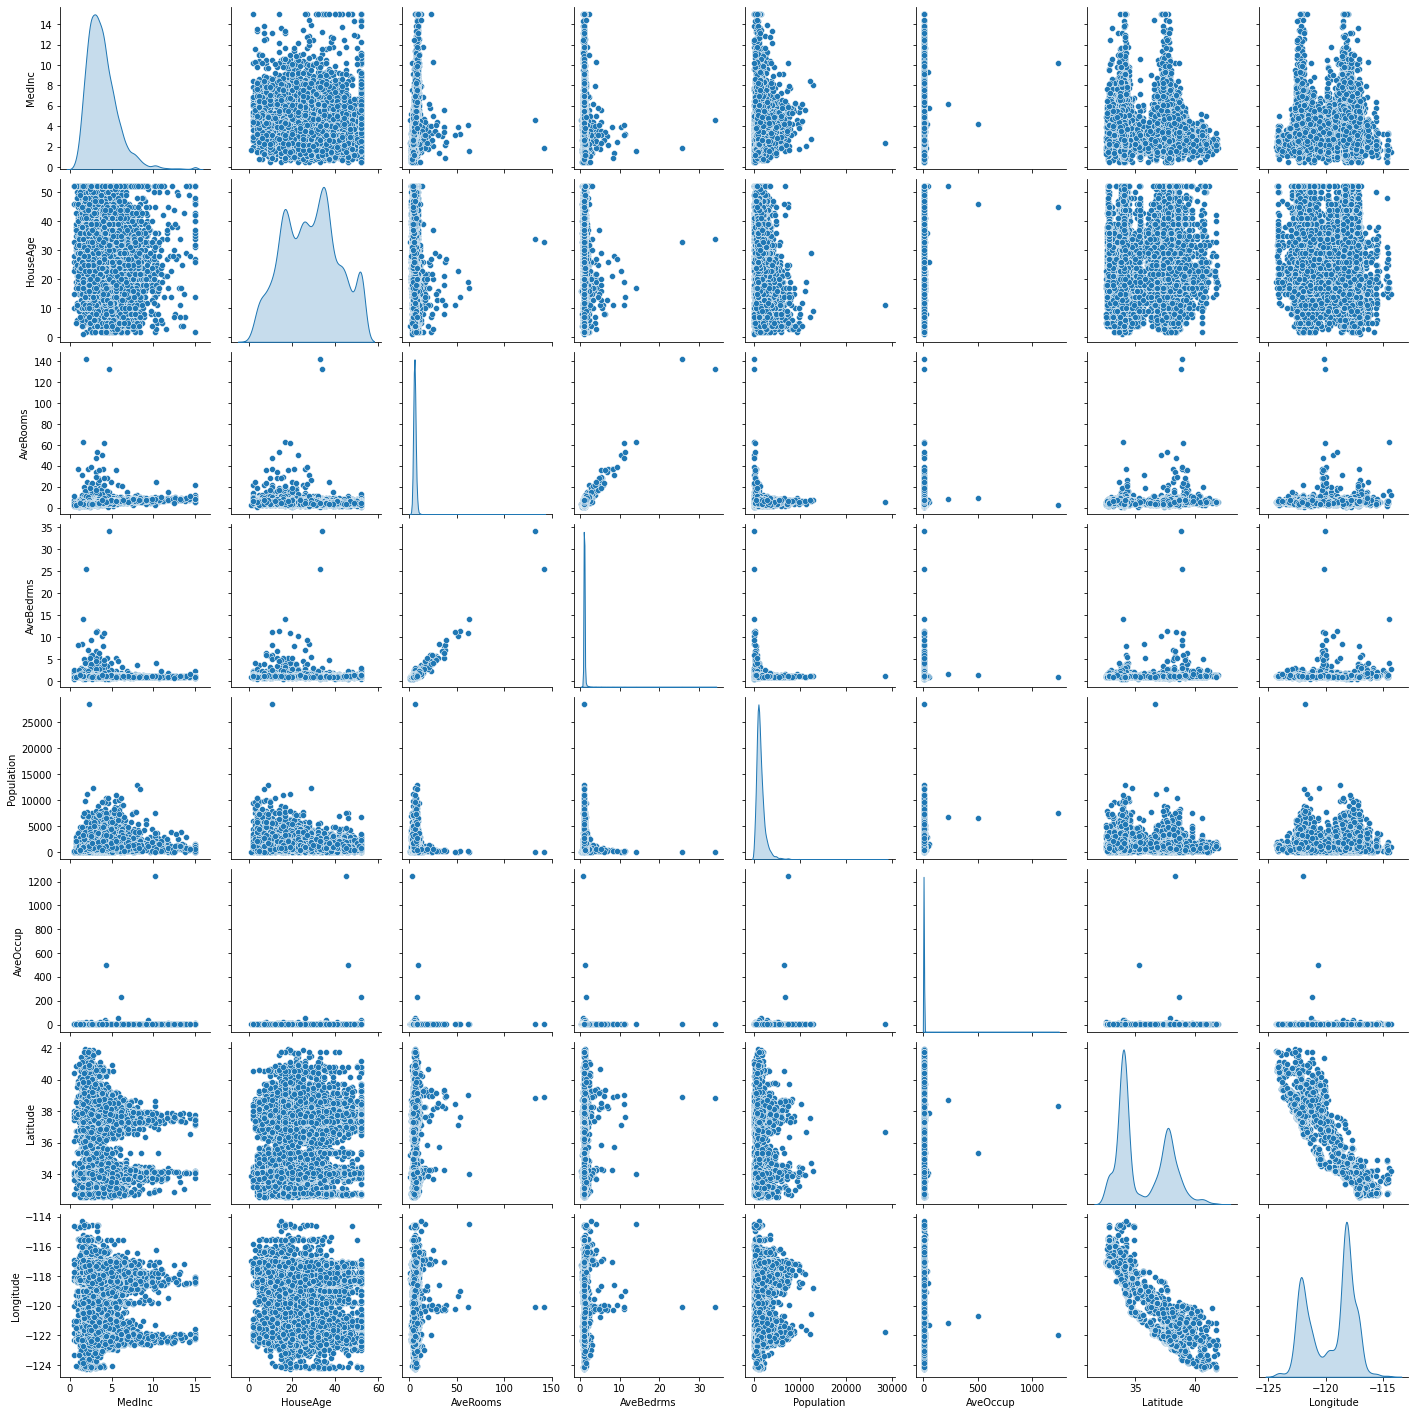

In [12]:
function_to_pair_plot_kde(df_sample)

In [13]:
def plot_heatmap(df):
    plt.figure(dpi = 120,figsize= (5,4))
    mask = np.triu(np.ones_like(df.corr(),dtype = bool))
    sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
    plt.yticks(rotation = 0)
    plt.xticks(rotation = 90)
    plt.title('Correlation Heatmap')
    plt.show()

plot heatmap to ensure our inferences about correlation

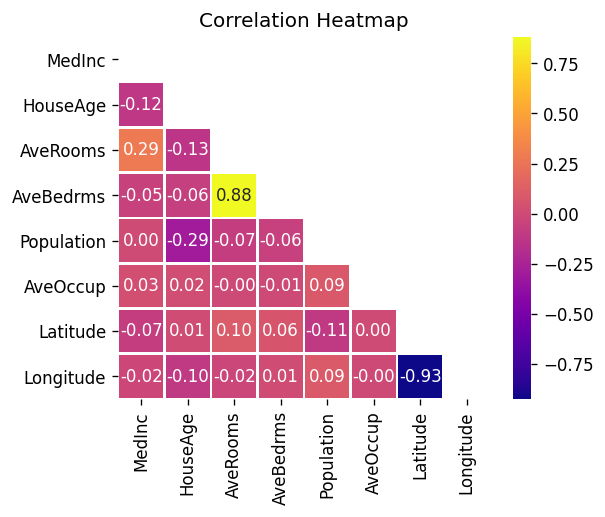

In [14]:
plot_heatmap(df_sample)

AvgOccupation are less likely to correlate (weak dependenece)
HouseAge and Population, MedInc are acceptable



We want to know the correlation between each attributes with Price

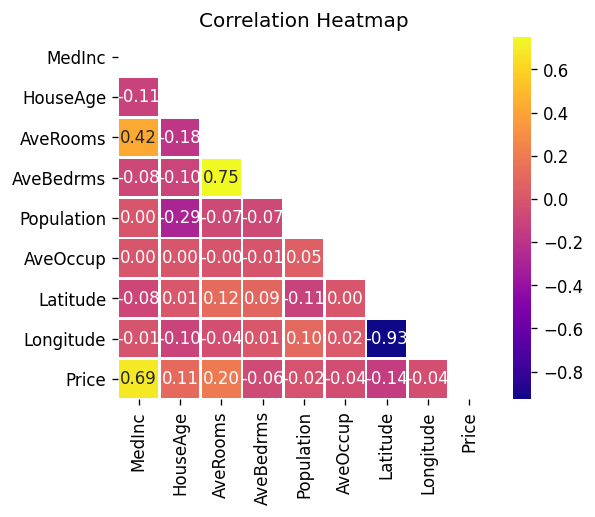

In [15]:
plot_heatmap(df_sample_full)

Median income seems to higly correlated with Price, it's supposed to be the most influential on Price



Median income with the rest 

Correlation between MedInc and HouseAge ==>  -0.11333358863225798


<Figure size 500x400 with 0 Axes>

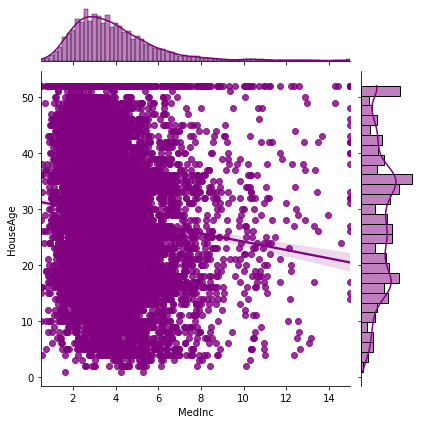

Correlation between MedInc and AveRooms ==>  0.42462077897975153


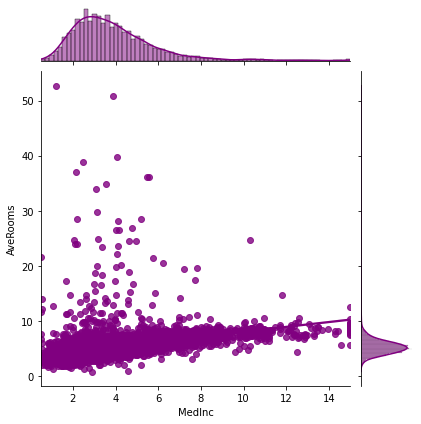

Correlation between MedInc and AveBedrms ==>  -0.07845195012976924


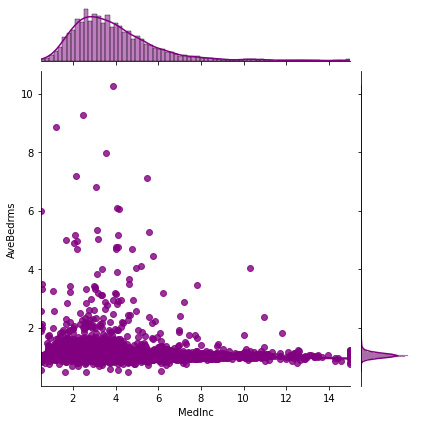

Correlation between MedInc and Population ==>  0.0031609775802377716


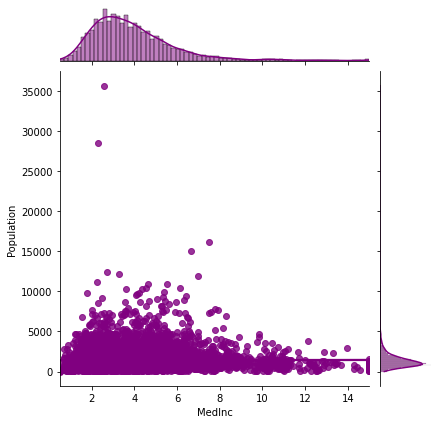

Correlation between MedInc and AveOccup ==>  0.0011972152181826832


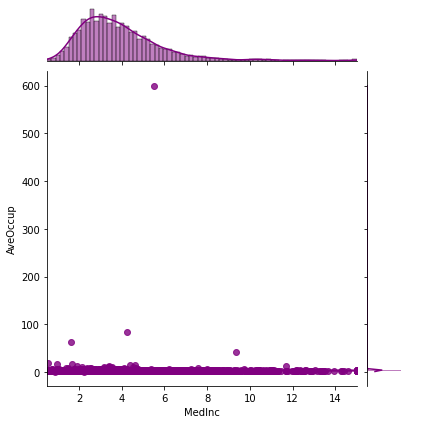

Correlation between MedInc and Latitude ==>  -0.08167503146892224


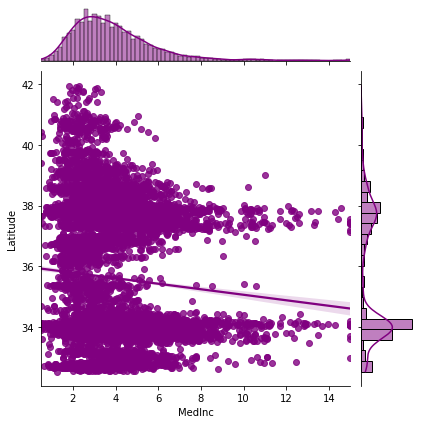

Correlation between MedInc and Longitude ==>  -0.009076690104061811


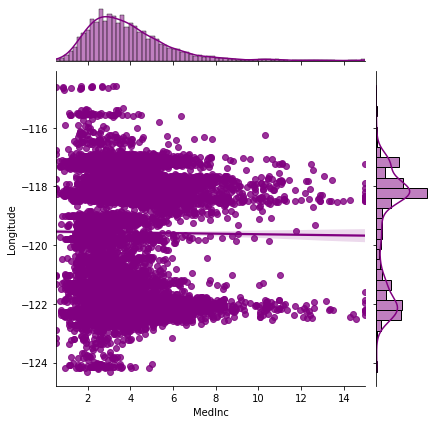

Correlation between MedInc and Price ==>  0.6862852352366182


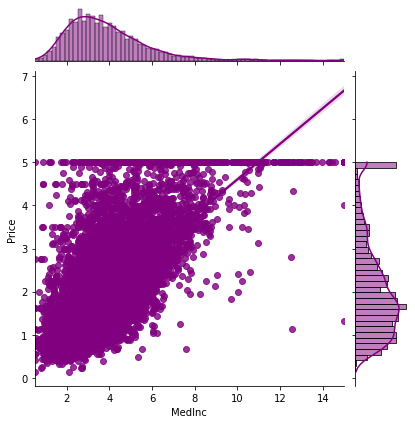

In [16]:
plt.figure(dpi = 100, figsize = (5,4))
print("Median income with the rest \n")
for i in  df_sample_full.columns:
    if i != 'MedInc':
        print(f"Correlation between MedInc and {i} ==> ",df_sample_full.corr().loc['MedInc'][i])
        sns.jointplot(x='MedInc',y=i,data=df_sample_full,kind = 'reg',color = 'purple')
        plt.show()

I still suspect on avg bedroom and avg room with Median income so it's reasonable to plot dependent line.

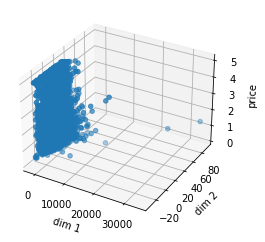

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x = df_sample_full.loc[ : , df_sample_full.columns != 'Price']
y = df_sample_full.Price
pca.fit(x)

x_new = pca.transform(x)

xs = x_new[:,0]
ys = x_new[:,1]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=xs,ys=ys,zs=y)
ax.set_xlabel("dim 1")
ax.set_ylabel("dim 2")
ax.set_zlabel("price")
plt.show()

if we compute PCA, some outliers are detected though it's vague to find out anything new

Next we might want to remove these outliers based on pairplot above. It might help in transforming our data distribution under a normal one

In [18]:
df_sample_full = df_sample_full.drop(df_sample_full[df_sample_full.AveOccup > 1200].index,axis=0)

Correlation between MedInc and AveOccup ==>  0.0011972152181826832


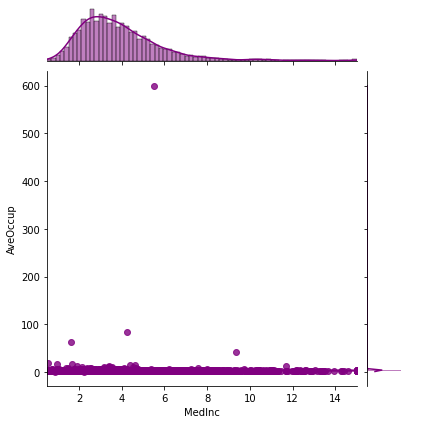

In [19]:
def draw_corr_between_two(df, attribute1, attribute2):
    print("Correlation between {} and {} ==> ".format(attribute1, attribute2),df.corr().loc[attribute1][attribute2])
    sns.jointplot(x=attribute1,y=attribute2,data=df,kind = 'reg',color = 'purple')
    plt.show()
draw_corr_between_two(df_sample_full, "MedInc", "AveOccup")

Try using natural log for MedInc.

In [20]:
import math
df_sample_full["LogMedInc"] = np.log(df_sample_full.MedInc)

In [21]:
df_sample_full.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,LogMedInc
3278,3.3929,13.0,8.580645,1.790323,214.0,3.451613,39.14,-122.70,1.083,1.221685
4358,3.9783,52.0,4.532308,1.069231,1258.0,1.935385,34.08,-118.37,3.741,1.380855
14636,3.1304,16.0,3.790936,1.160819,1235.0,1.805556,32.80,-117.19,1.663,1.141161
14822,1.1250,52.0,5.333333,1.333333,8.0,2.666667,32.66,-117.12,0.600,0.117783
461,1.1859,52.0,2.922023,1.051633,1721.0,1.813488,37.87,-122.26,2.417,0.170502


Correlation between LogMedInc and AveOccup ==>  -0.0016175398847201963


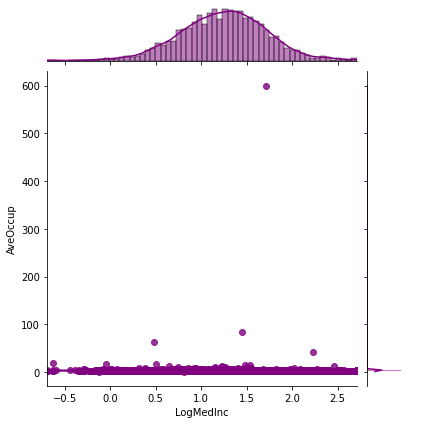

In [22]:
draw_corr_between_two(df_sample_full, "LogMedInc", "AveOccup")

It's slightly skew at left side

In [23]:
!pip install statsmodels

You should consider upgrading via the 'c:\python\python36\python.exe -m pip install --upgrade pip' command.


In [24]:
import statsmodels.api as sm
import stat_util


In [25]:
def plot_qq(df, attribute):
    mean, var = stat_util.TrimmedMeanVar(df[attribute], p=0.01)
    std = math.sqrt(var)

    xs = [-4, 4]
    fxs, fys = stat_util.FitLine(xs, mean, std)
    plt.plot(fxs, fys, linewidth=4, color='grey')
    xs, ys = stat_util.NormalProbability(df[attribute])
    plt.plot(xs, ys)
    plt.show()


In [26]:
import plot_util
def MakeNormalModel(weights):
    
    # estimate parameters: trimming outliers yields a better fit
    mu, var = stat_util.TrimmedMeanVar(weights, p=0.01)
    print('Mean, Var', mu, var)
    
    # plot the model
    sigma = math.sqrt(var)
    print('Sigma', sigma)
    xs, ps = stat_util.RenderNormalCdf(mu, sigma, low=0, high=12.5)

    plt.plot(xs, ps, label='model', color='0.8')

    # plot the data
    cdf = stat_util.Cdf(weights, label='data')

    plot_util.PrePlot(1)
    plt.plot(cdf.xs, cdf.ps)

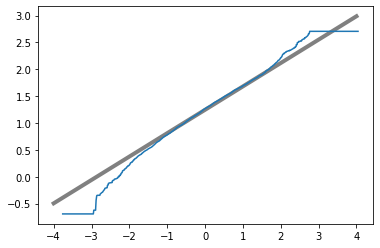

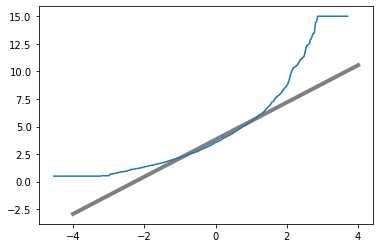

In [27]:
plot_qq(df_sample_full, 'LogMedInc')
plot_qq(df_sample_full, 'MedInc')

Mean, Var 1.2463743778991185 0.18982193433774694
Sigma 0.4356855911523205


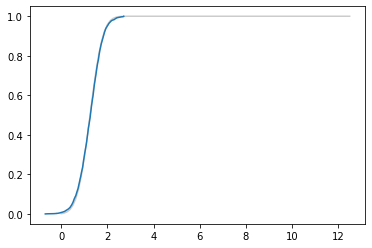

In [28]:
MakeNormalModel(df_sample_full.LogMedInc)

Let visualize qqplot for all attributes

MedInc


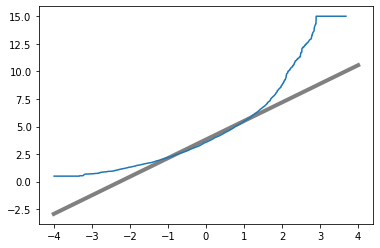

HouseAge


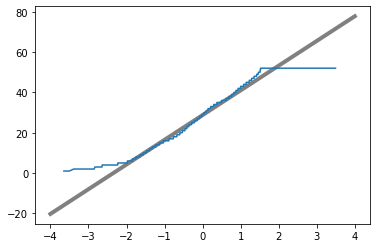

AveRooms


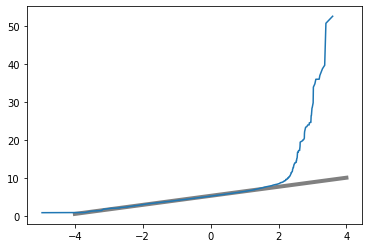

AveBedrms


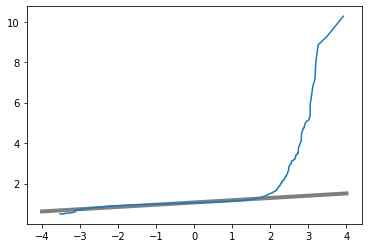

Population


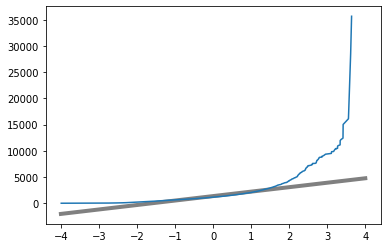

AveOccup


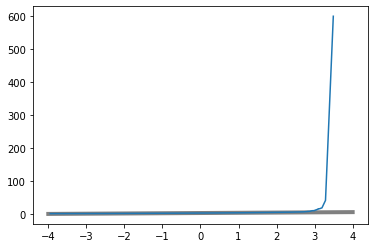

Latitude


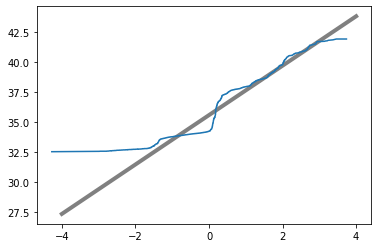

Longitude


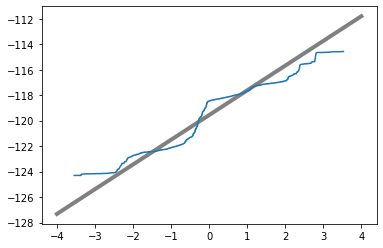

Price


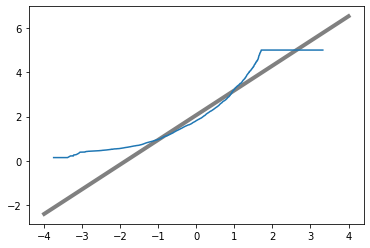

LogMedInc


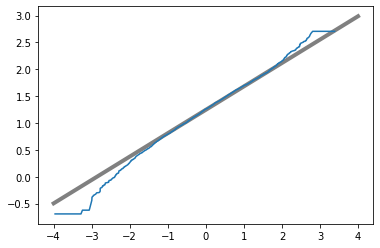

In [29]:
for attr in df_sample_full.columns:
    print(attr)
    plot_qq(df_sample_full, attr)

In [30]:
df_sample_full = df_sample_full[df_sample_full.Population < 20000]

Correlation between LogMedInc and LogPopulation ==>  0.04734247549081775


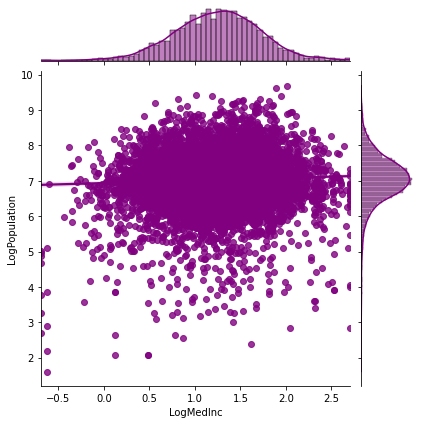

In [31]:
df_sample_full["LogPopulation"] = np.log(df_sample_full.Population)
draw_corr_between_two(df_sample_full, "LogMedInc", "LogPopulation")

Correlation between LogMedInc and Population ==>  0.035668993273793685


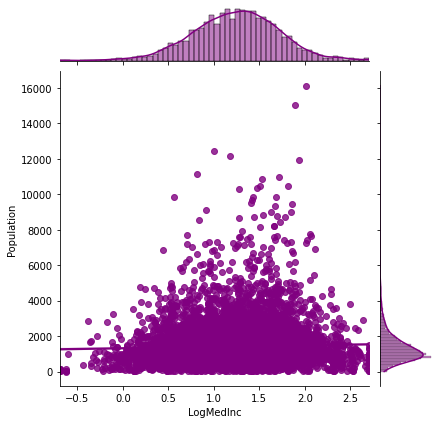

In [32]:
draw_corr_between_two(df_sample_full, "LogMedInc", "Population")

Correlation between LogMedInc and AveRooms ==>  0.4078345356794379


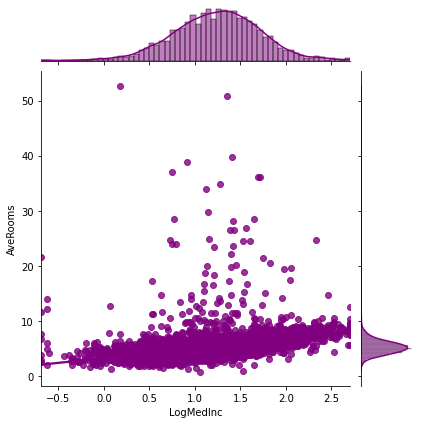

In [33]:
draw_corr_between_two(df_sample_full, "LogMedInc", "AveRooms")

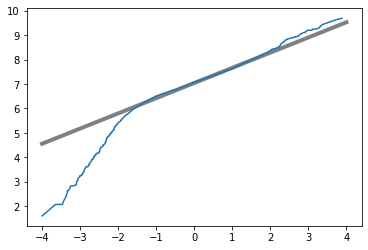

In [34]:
plot_qq(df_sample_full, "LogPopulation")

Mean, Var 7.0412703778190044 0.38516461130678264
Sigma 0.6206163156949571


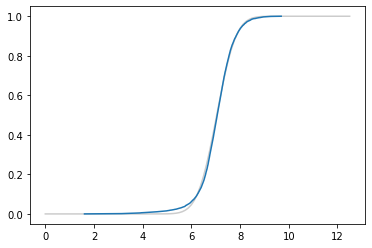

In [35]:
MakeNormalModel(df_sample_full.LogPopulation)

LogPopulation is likely transformed to normal distribution know but it increases the correlation with LogMedInc

To modify data well and validate the outliers, we should make some hypothesis testing between groups (attributes). Let write some code. We perform CI.

In [36]:
def statistic_numbers(distribution):
    """
    return:
    sample mean
    standard deviation
    z-score
    """
    return np.mean(distribution), stats.zscore(distribution)

In [37]:
meann, z_score = statistic_numbers(df_sample_full.LogPopulation)
meann, z_score

(7.0271061044279115,
 array([-2.28749251,  0.15171502,  0.12630507, ..., -0.16160306,
         2.05909653,  0.65269819]))

In [38]:
df_sample_full["SqrtAveRooms"] = np.sqrt(df_sample_full.AveRooms)

In [39]:
df_sample_full["SqrtSqrtAveRooms"] = np.sqrt(df_sample_full.SqrtAveRooms)

C:\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


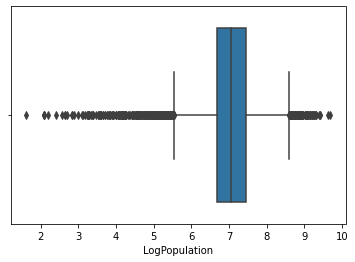

In [56]:
sns.boxplot(df_sample_full.LogPopulation)
plt.show()

By ploting the boxplot and reconcile with qq plot above, the outlier lies in range [... ,5.5] and [8.5, ...]

In [42]:
df_sample_full["SqrtPopulation"] = np.sqrt(df_sample_full.Population)
df_sample_full["SqrtMedInc"] = np.sqrt(df_sample_full.MedInc)

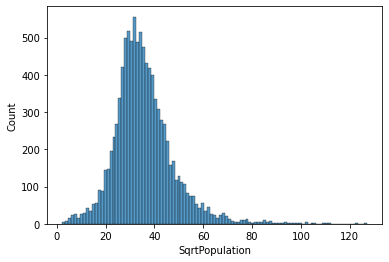

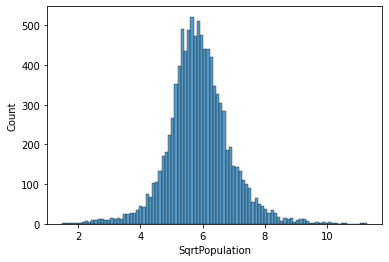

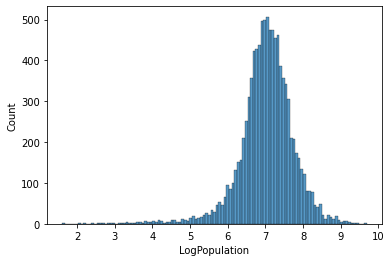

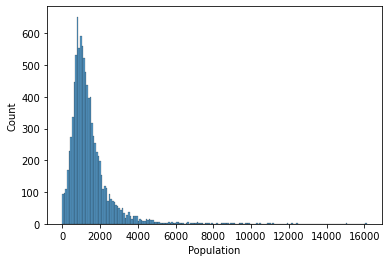

In [58]:
sns.histplot(df_sample_full.SqrtPopulation)
plt.show()
sns.histplot(np.sqrt(df_sample_full.SqrtPopulation))
plt.show()
sns.histplot(df_sample_full.LogPopulation)
plt.show()
sns.histplot(df_sample_full.Population)
plt.show()

In [62]:
df_sample_full["SqrtSqrtPopulation"] = np.sqrt(df_sample_full["SqrtPopulation"])

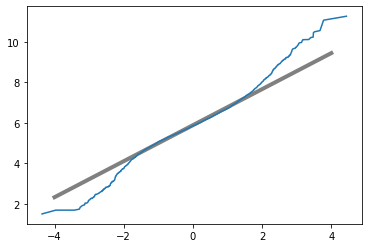

In [77]:
plot_qq(df_sample_full, "SqrtSqrtPopulation")


In [53]:
print(stats.skew(np.sqrt(df_sample_full.SqrtPopulation)))
print(stats.skew(np.sqrt(df_sample_full.SqrtMedInc)))

0.15860650080137806
0.2879824695962745


Two time sqrt of population decreases the skewness, make it a normal distribution

In [36]:
# try sknewness:
skewness_medinc = stats.skew(df_sample_full.LogMedInc)
skewness_pop = stats.skew(df_sample_full.LogPopulation)
print(skewness_medinc)
print(skewness_pop)

-0.1432678935686654
-1.0830296949967844


LogPopulation is still not distributed as normality meanwhile LogMedInc is safely in normal distribution

In [37]:
def check_skewness(skewness):
    if abs(skewness) <0.5:
        return True 
    return False

In [38]:
def detect_outliers(df, attribute, normal):
    print(normal)
    outlier_index = []
    if normal == True:
        _, z_score = statistic_numbers(df[attribute])
        print(z_score.shape)
        for i in range(len(z_score)):
            if (z_score[i]) >3 or (z_score[i] < -3):
                outlier_index.append(i)
    else:
        cdf = stat_util.Cdf(df[attribute])
        Q1 = cdf.Percentile(25) 
        Q3 = cdf.Percentile(75) 
        IQR=Q3-Q1
        lowqe_bound=Q1 - 1.5 * IQR
        upper_bound=Q3 + 1.5 * IQR
        
        for i in range(len(df)):
            if (df[attribute].iloc[i] < lowqe_bound) | (df[attribute].iloc[i] > upper_bound) :
               outlier_index.append(i)

    return outlier_index


In [39]:
outlier_index_pop = detect_outliers(df_sample_full, 'LogPopulation', check_skewness(stats.skew(df_sample_full["LogPopulation"])))

False


In [40]:
outlier_index_medinc = detect_outliers(df_sample_full, "LogMedInc", check_skewness(stats.skew(df_sample_full["LogMedInc"])))

True
(9997,)


In [43]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [42]:
print(outlier_index_pop)
print(outlier_index_medinc)

[45, 52, 88, 134, 164, 173, 194, 198, 214, 298, 317, 338, 378, 383, 401, 454, 515, 525, 532, 544, 659, 696, 733, 741, 759, 760, 776, 796, 848, 856, 895, 952, 972, 1029, 1042, 1053, 1063, 1082, 1084, 1096, 1105, 1106, 1147, 1198, 1216, 1222, 1281, 1298, 1299, 1314, 1320, 1368, 1376, 1482, 1502, 1517, 1529, 1548, 1554, 1594, 1595, 1604, 1607, 1701, 1710, 1730, 1732, 1744, 1756, 1759, 1811, 1829, 1848, 1856, 1870, 1877, 1878, 1902, 1931, 1941, 1958, 1989, 2059, 2065, 2118, 2185, 2215, 2216, 2222, 2237, 2252, 2375, 2424, 2481, 2488, 2512, 2531, 2583, 2655, 2657, 2711, 2740, 2768, 2793, 2815, 2828, 2938, 2983, 3006, 3014, 3091, 3100, 3105, 3122, 3133, 3141, 3157, 3187, 3192, 3210, 3223, 3242, 3301, 3319, 3340, 3341, 3342, 3360, 3363, 3364, 3372, 3411, 3432, 3439, 3442, 3445, 3504, 3516, 3527, 3537, 3539, 3580, 3581, 3621, 3625, 3639, 3670, 3697, 3700, 3764, 3808, 3844, 3906, 3909, 3919, 3948, 3955, 3989, 3998, 4008, 4012, 4028, 4094, 4099, 4107, 4156, 4185, 4186, 4188, 4203, 4212, 4225, 426

Now we got some outliers. We might want to check by removing these items in df_sample_full and make their histogram

In [87]:
df_sample_full_remove_outlier = df_sample_full.drop(df_sample_full.index[outlier_index_pop],axis=0)

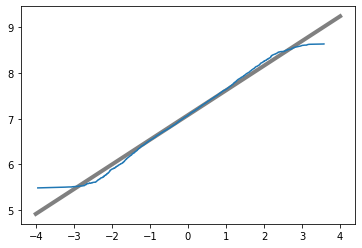

In [88]:
plot_qq(df_sample_full_remove_outlier, "LogPopulation")

Lol it's pretty good here. Check boxplot

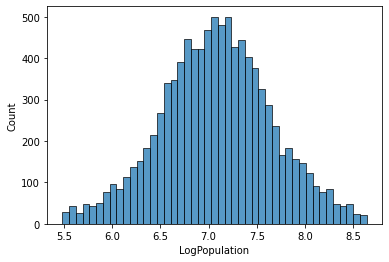

C:\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


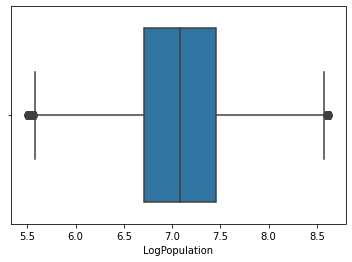

In [89]:
sns.histplot(df_sample_full_remove_outlier.LogPopulation)
plt.show()
sns.boxplot(df_sample_full_remove_outlier.LogPopulation)
plt.show()

Honestly I do not want to eliminate the outliers because the upcoming records which need to be predicted are outliers as well. So I will separate them between 2 different sets. One we train as usual, one we will take consideration late.

I'm still thinking if we should remove outliers or not, because log transform is such a way to make data distribute naturally. 

We have tried some methods and removing outliers is not preferrable. Completeness of data should be preserved rather than updating it because the notion of outliers is vague.

---------------------------------------------------------------------------------------------------------------------------------------------------

### Continuous Inference ###

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

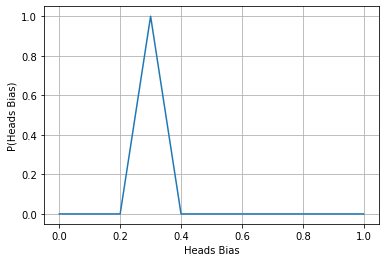

In [20]:
""" 
Say someone randomly drew a coin from a pile produced by the factory. The coin’s bias happens to be:

  P{Heads Bias} = 0.3
However, you don’t know this yet. The person hands you the coin and asks you to estimate its bias. If you want to do this by using Bayes’ theorem, 
you would flip the coin many times and use the outcomes to update the probability of each possible value of its bias. In other words, after each flip
you would update the prior probability distribution to obtain the posterior probability distribution.
After a number of simulation, the distribution of posterior of head reach to a state where its highest peak is our bias.
"""
N = 1000 # Number of flips
BIAS_HEADS = 0.3 # The bias of the coin


bias_range = np.linspace(0, 1, 11) # The range of possible biases
prior_bias_heads = np.ones(len(bias_range)) / len(bias_range) # Uniform prior distribution
for i in range(N):
    rand_flip = random.random()
    if rand_flip > BIAS_HEADS :
        flip = 0 #tail
    else:
        flip = 1 #head
    likelihood = bias_range**flip * (1-bias_range)**(1-flip) # binomial distribution
    evidence = np.sum(likelihood * prior_bias_heads)
    prior_bias_heads = likelihood * prior_bias_heads / evidence

plt.plot(bias_range, prior_bias_heads)
plt.xlabel('Heads Bias')
plt.ylabel('P(Heads Bias)')
plt.grid()
plt.show()

In [18]:
prior_bias_heads.mean()

0.09090909090909091

If the bias of coin is 0.5 (fair), the peak of this distribution will be closely 0.5

[0.  0.2 0.4 0.6 0.8 1. ]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


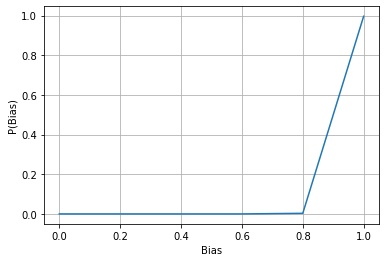

In [14]:
""" 
Dice problem: Like coin, you are given two dice, one is fair and one is three-headed. After yielding the dice, you got a number. How to know which dice you choosed ?
On the other hand, what probability you picked the biased dice ?
"""
N = 10000 # Number of rolls
BIAS_HEADS = 0.6 # The bias of the dice

bias_range = np.linspace(0, 1, 101)
print(bias_range)
# The range of possible biases

# hypothesis array
prior_bias_heads = np.ones(len(bias_range)) / len(bias_range) # Uniform prior distribution

print(prior_bias_heads)
series = [0,1,2,2,1,4,5,4,3,3,4,2,0] 

for i in range(len(series)):
    flip = series[i] # we can think of it as index of bias in prior_bias_heads
    
    likelihood = bias_range**flip # multinominal distribution
    evidence = np.sum(likelihood * prior_bias_heads)
    prior_bias_heads = likelihood * prior_bias_heads / evidence

plt.plot(bias_range, prior_bias_heads)
plt.xlabel('Bias')
plt.ylabel('P(Bias)')
plt.grid()
plt.show()